### An insurance company has data on total insured value for year 2015 and year 2016 across commercial and residential properties. It wants to check - 
1.	If there is  any difference in the total insured value for year 2015 and 2016. 
2.	If there is any difference in total insured value for year 2016 for commercial and residential properties .
3.	If there is any difference in total insured value for year 2015 and year 2016 for commercial and residential properties. 

In [52]:
.libPaths("/home/rstudio/R/x86_64-pc-linux-gnu-library/3.4")

In [53]:
library(dplyr)
library(VIM)
library(ggplot2)
library(vioplot)
library(beanplot)

In [54]:
insurance.data <- read.csv("TIV_insurance.csv", stringsAsFactors = F)
dim(insurance.data)

[1] 36634     6

In [55]:
str(insurance.data)

'data.frame':	36634 obs. of  6 variables:
 $ policyID   : int  119736 448094 206893 333743 172534 785275 995932 223488 433512 142071 ...
 $ statecode  : chr  "NCR" "NCR" "NCR" "NCR" ...
 $ tiv_2015   : num  498960 1322376 190724 79521 254282 ...
 $ tiv_2016   : num  792149 1438164 192477 86854 246144 ...
 $ Residential: int  1 1 1 1 1 1 0 1 1 1 ...
 $ Commercial : int  0 0 0 0 0 0 1 0 0 0 ...


In [56]:
insurance <- insurance.data[, c("tiv_2015", "tiv_2016", "Residential", "Commercial")]
insurance.res <- insurance[insurance$Residential == 1, ] 
insurance.comm <- insurance[insurance$Commercial == 1, ]

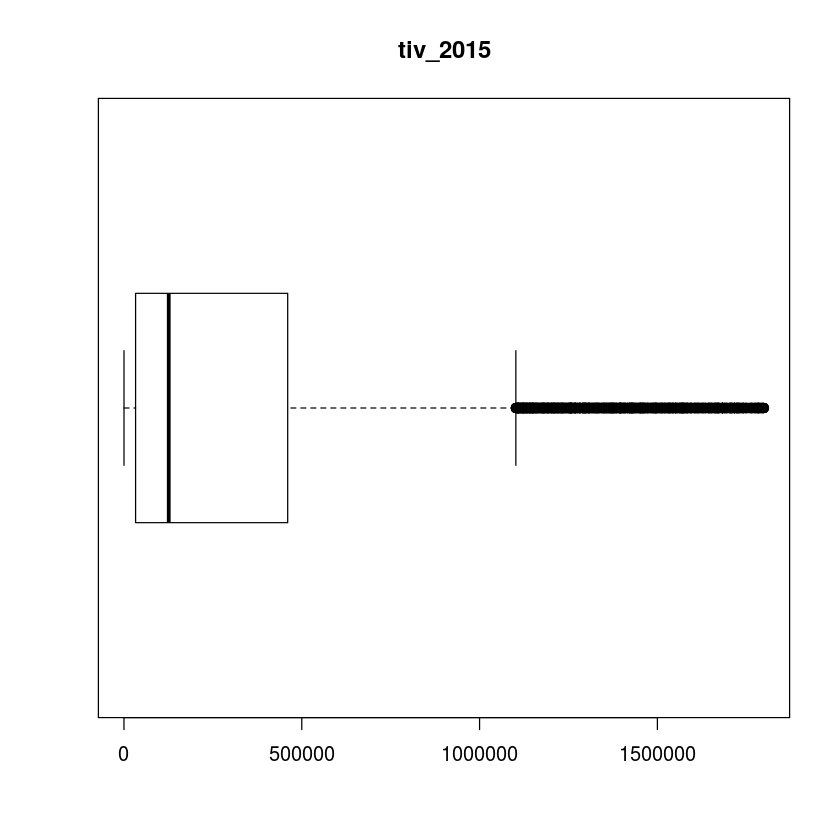

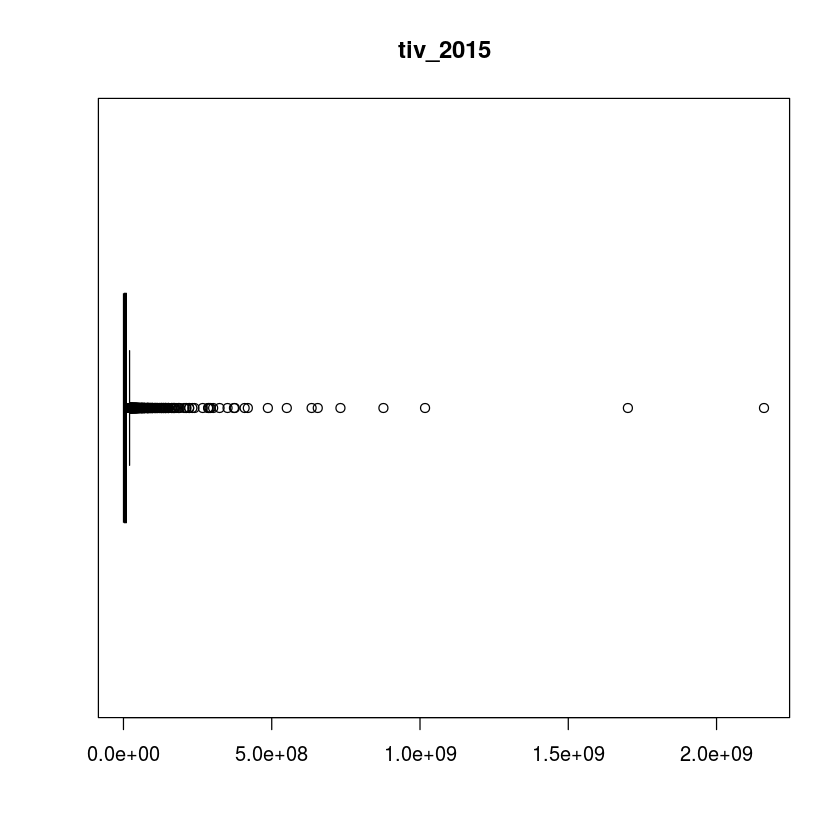

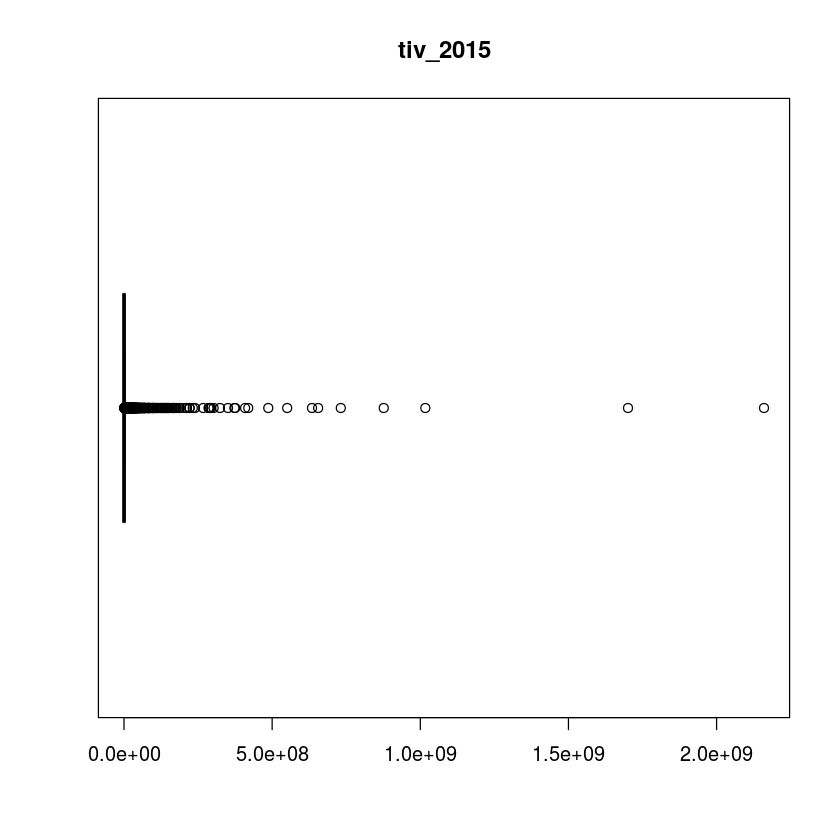

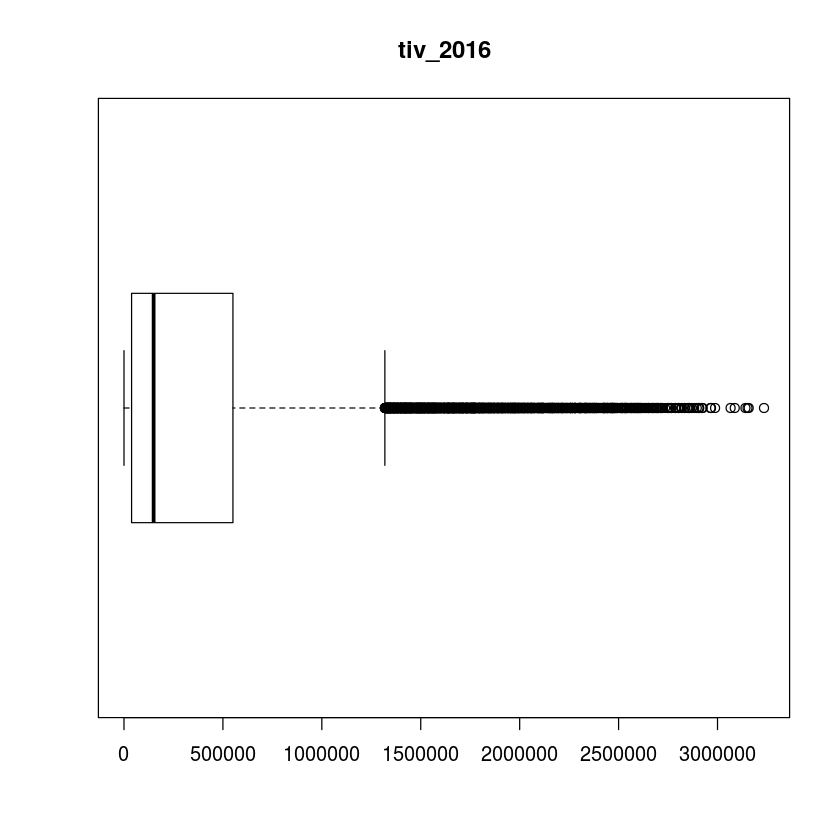

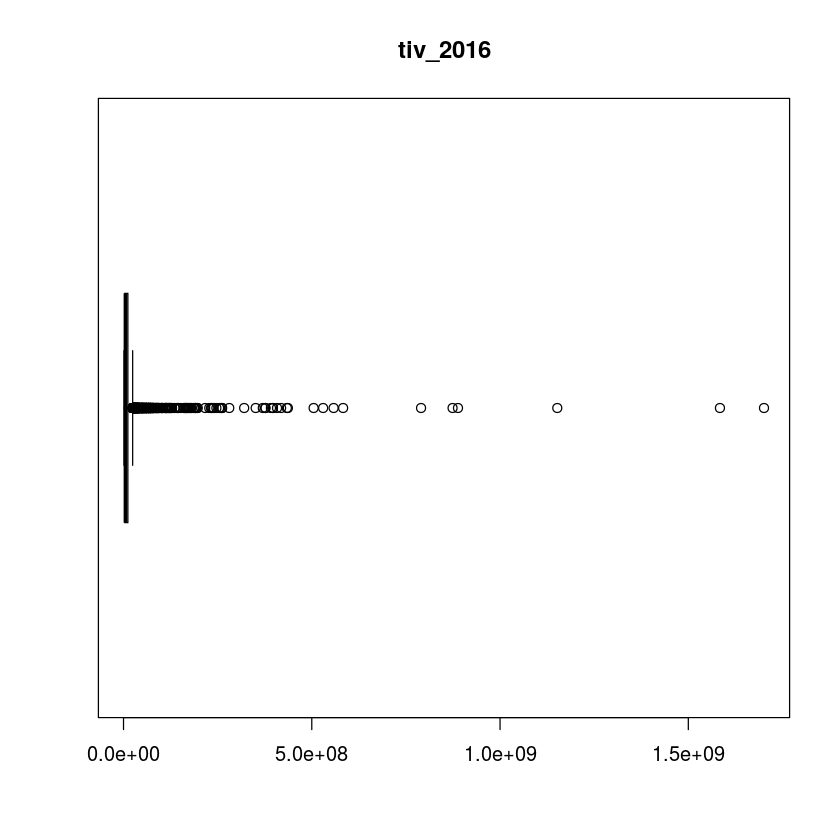

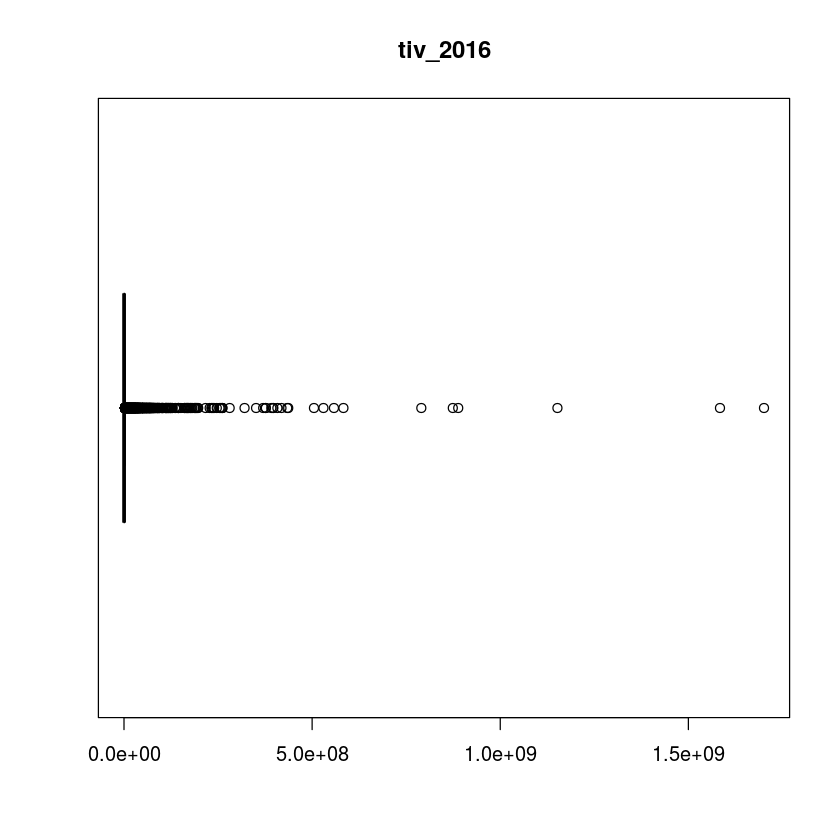

In [57]:
for(x in c("tiv_2015", "tiv_2016")){ 
    boxplot(insurance.res[,x], horizontal=TRUE, main=x)                   
    boxplot(insurance.comm[,x], horizontal=TRUE, main=x)
    boxplot(insurance[,x], horizontal=TRUE, main=x) 
}

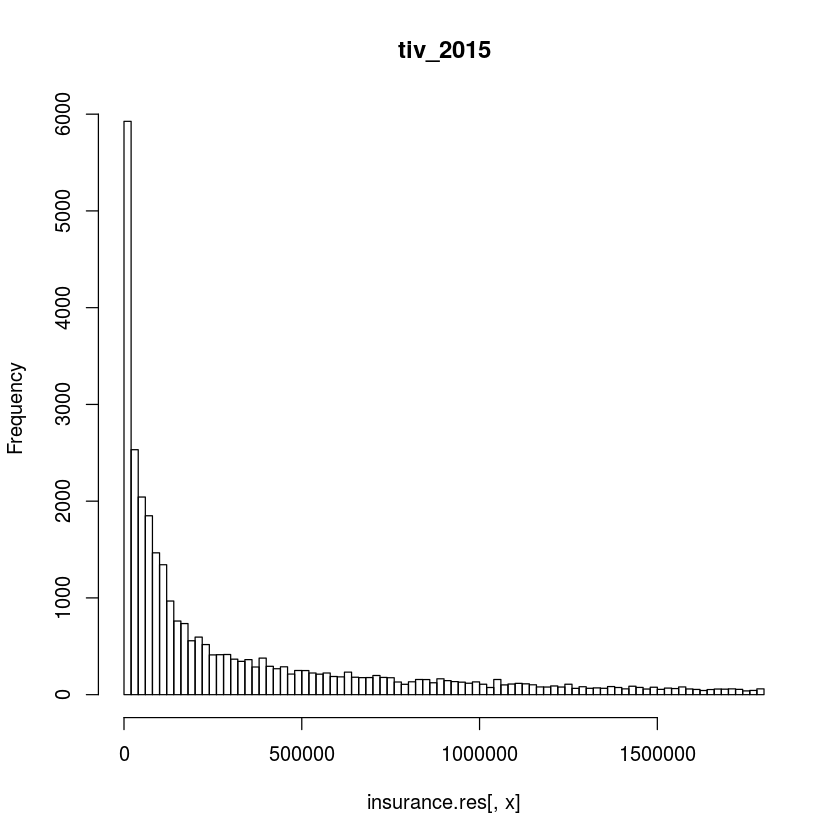

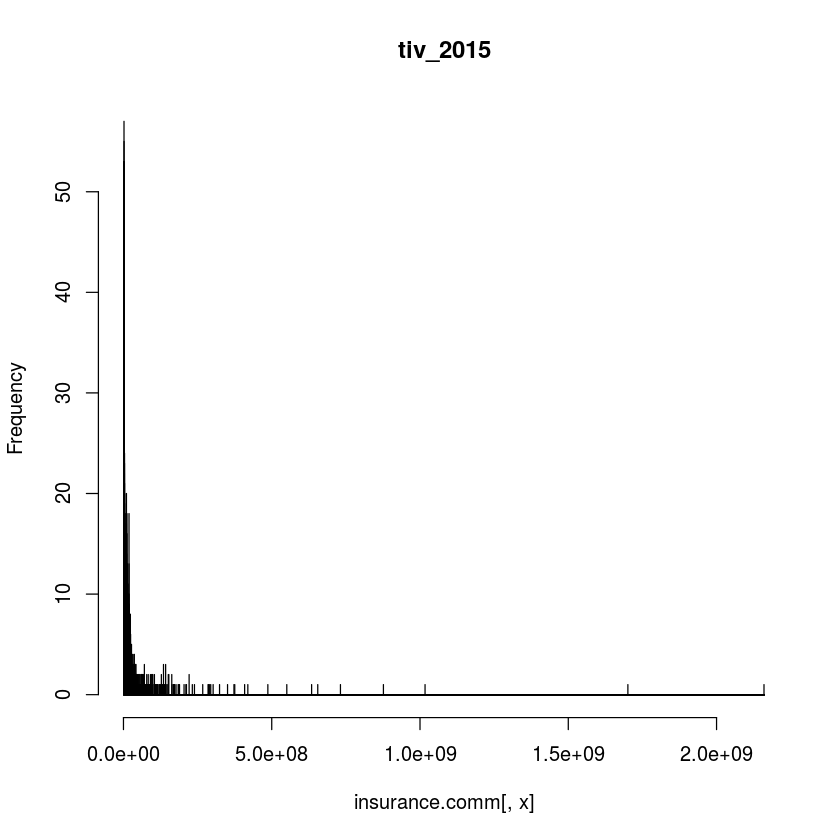

Warning message in breaks[-1L] + breaks[-nB]:
“NAs produced by integer overflow”

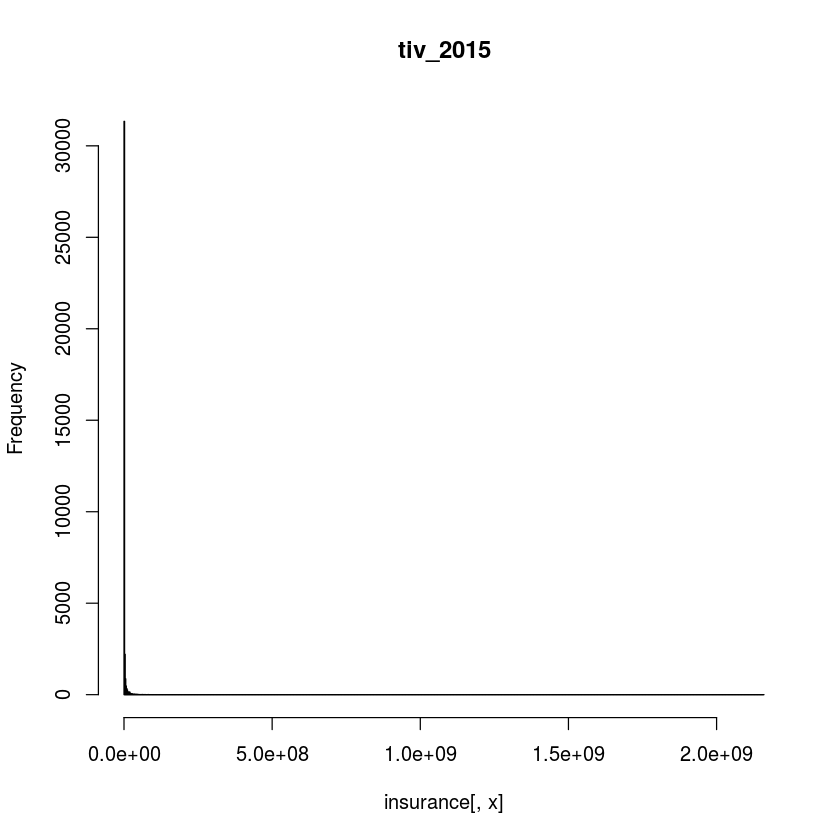

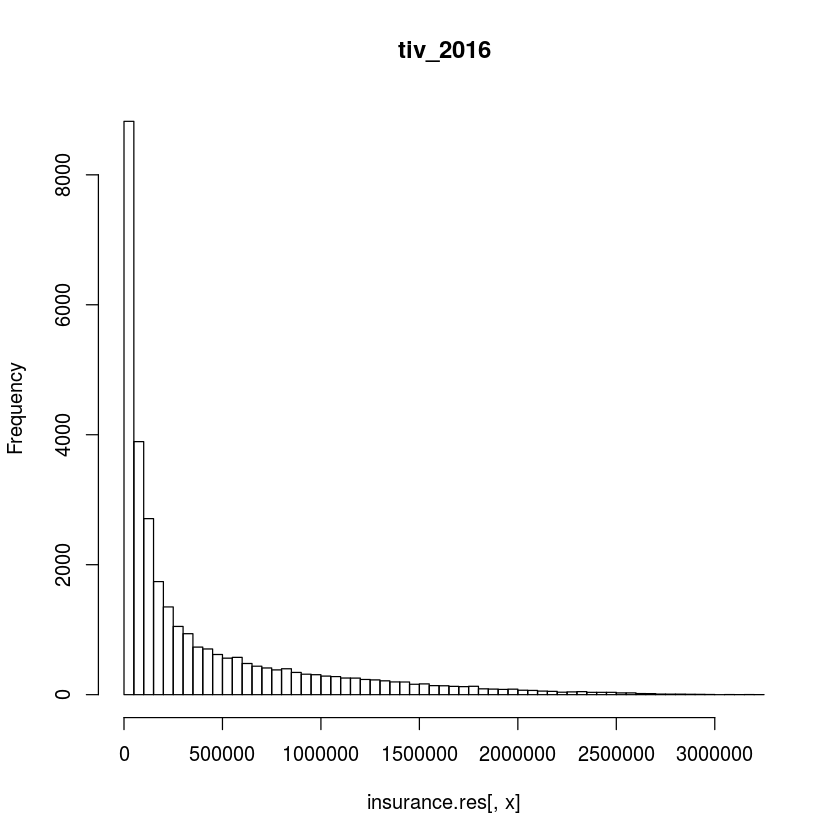

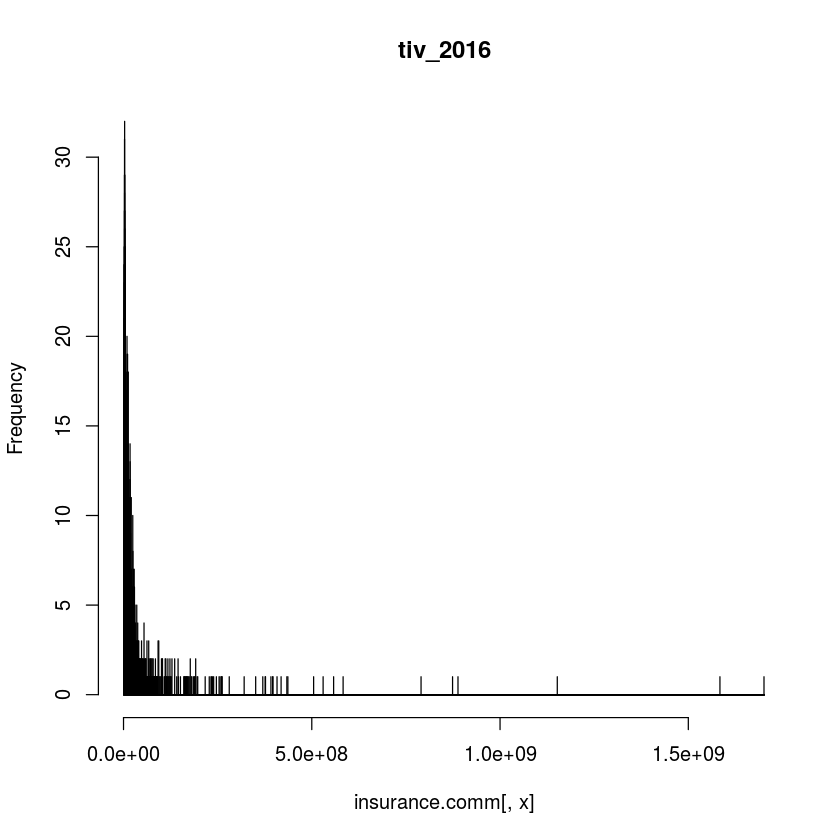

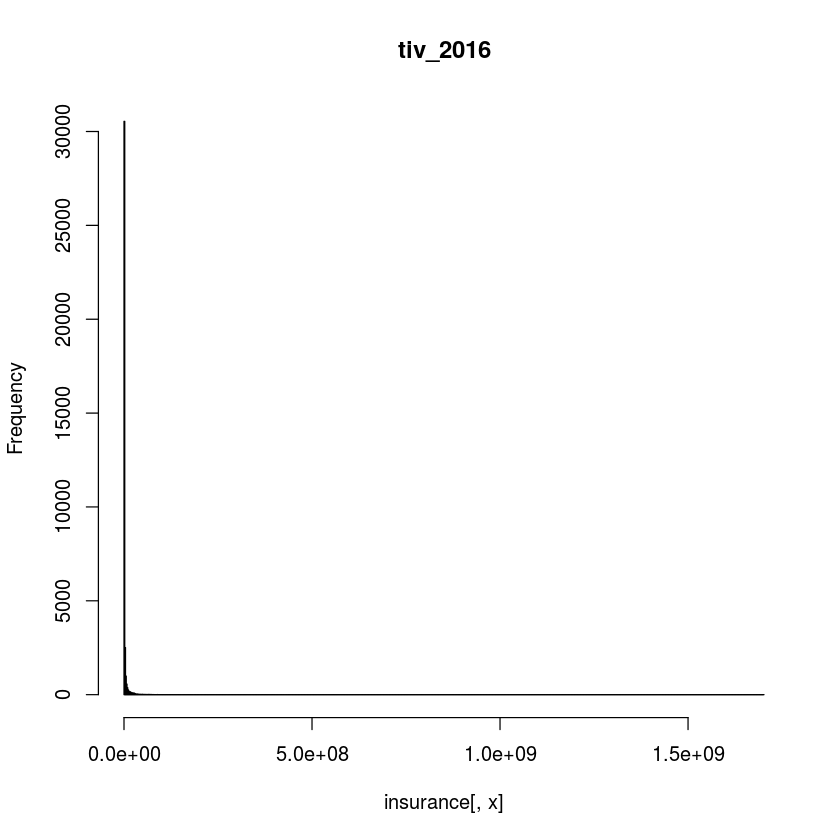

In [58]:
for(x in c("tiv_2015", "tiv_2016")){
    hist(insurance.res[,x], breaks=100, main = x) 
    hist(insurance.comm[,x], breaks=100000, main = x)
    hist(insurance[,x], breaks=1000, main = x) 
}

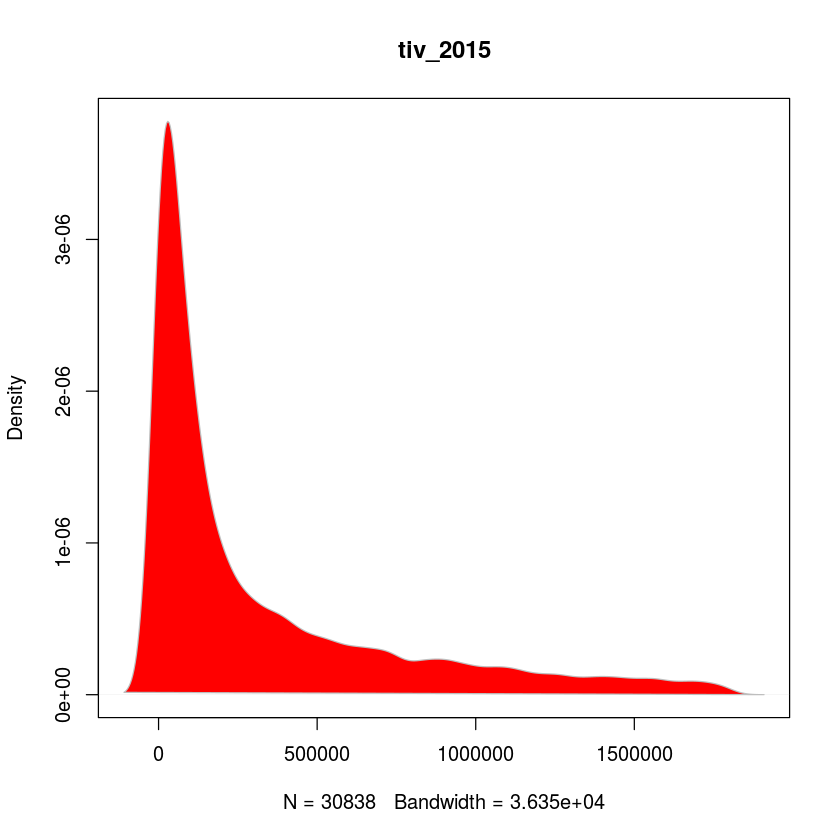

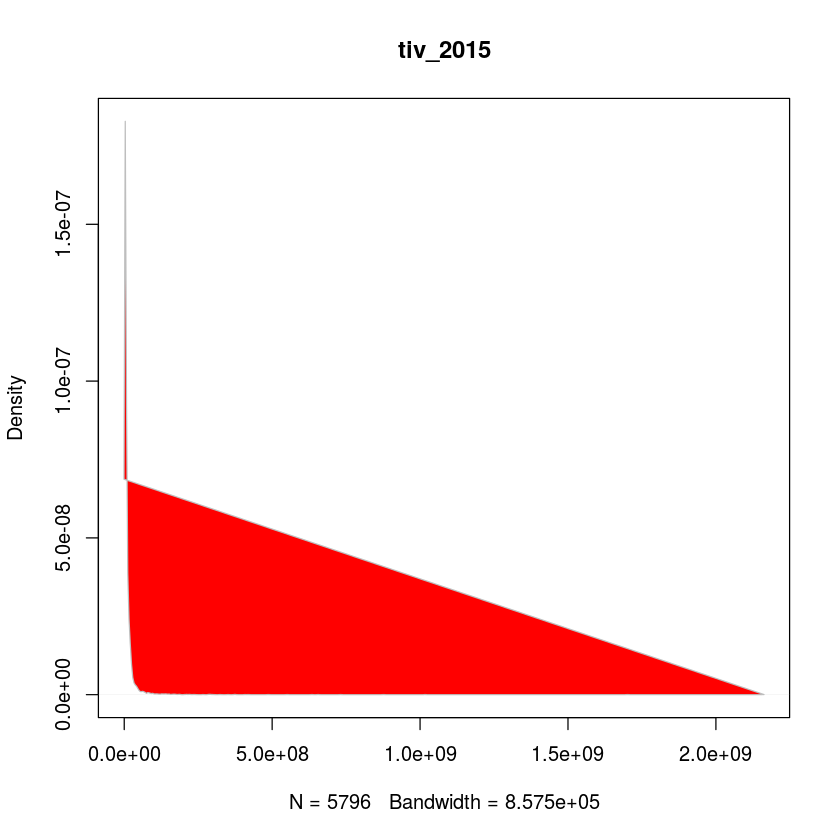

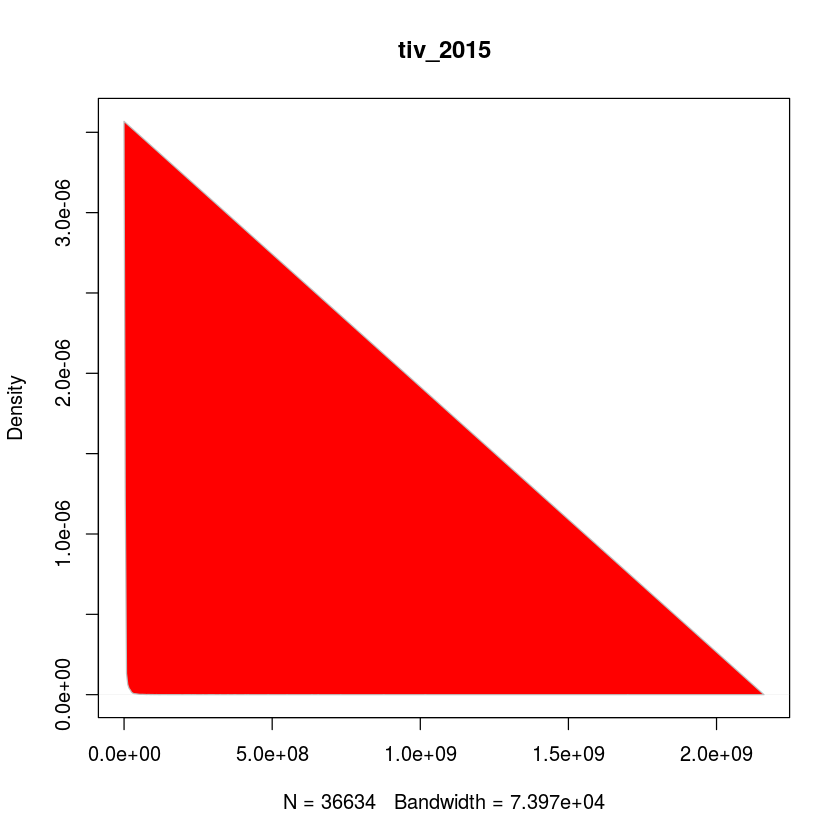

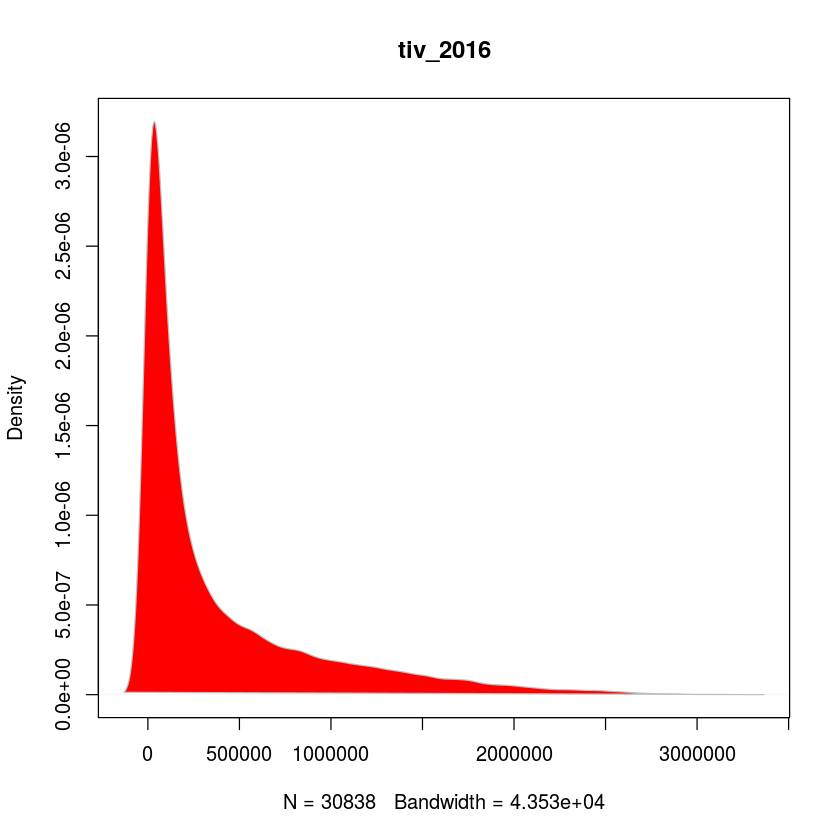

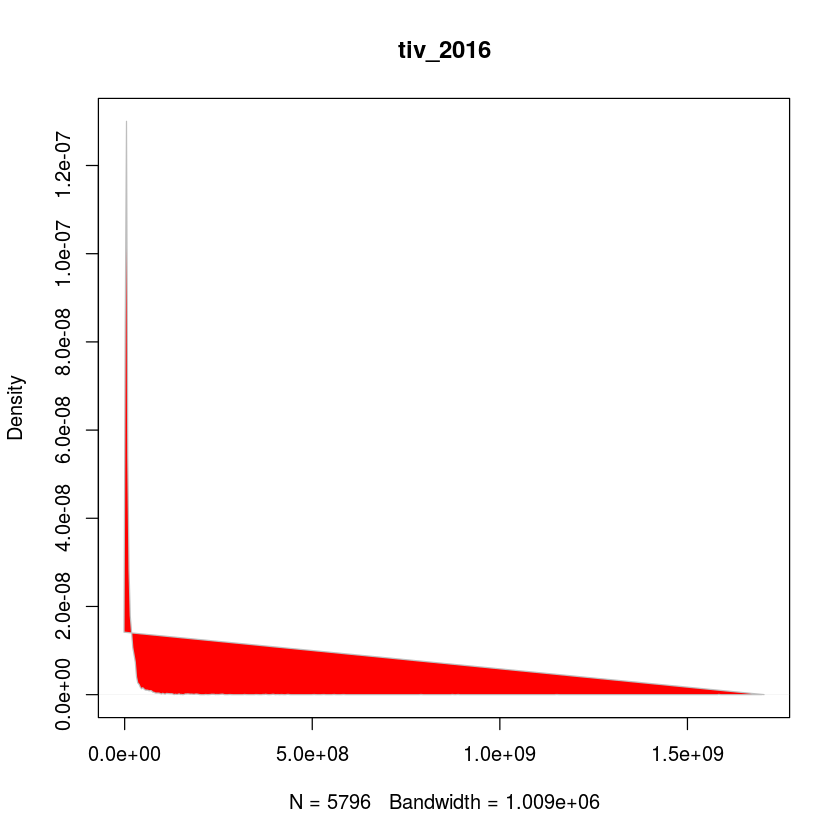

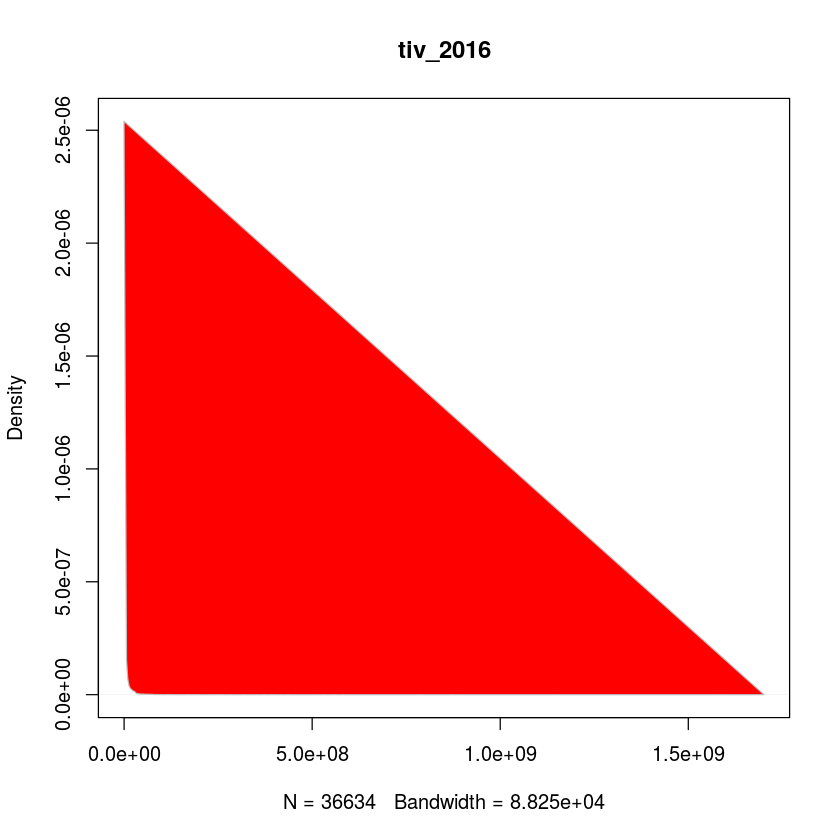

In [59]:
for(x in c("tiv_2015", "tiv_2016")){ 
    den <- density(insurance.res[, x])
    plot(den, type="n", main=x)
    polygon(den, col="red", border="gray") 
    den2 <- density(insurance.comm[, x]) 
    plot(den2, type="n", main=x) 
    polygon(den2, col="red", border="gray") 
    den2 <- density(insurance[, x]) 
    plot(den2, type="n", main=x) 
    polygon(den2, col="red", border="gray") 
}

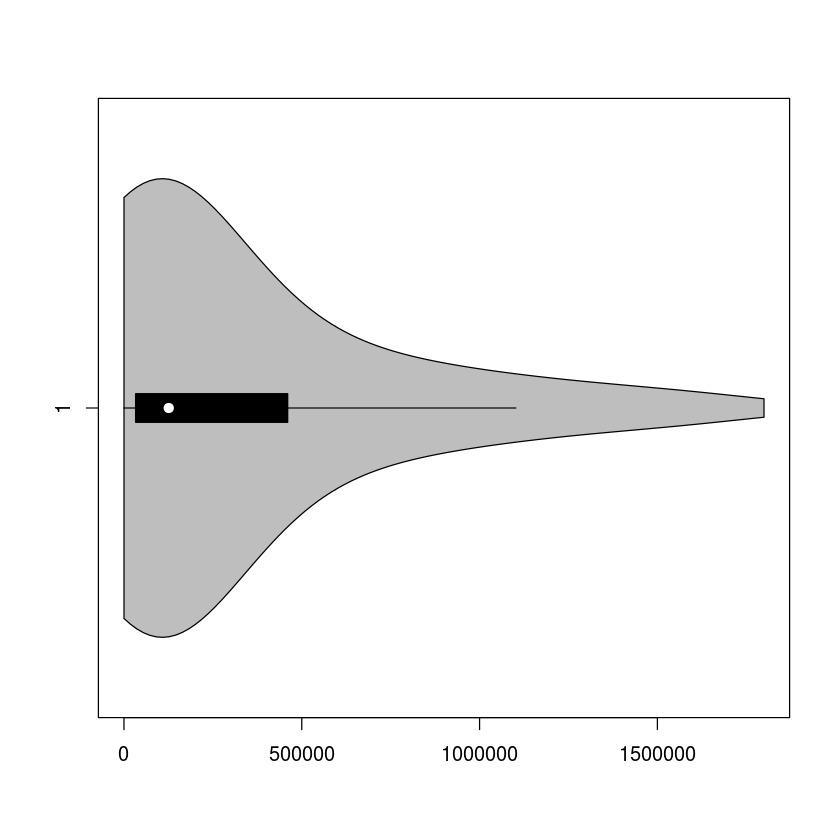

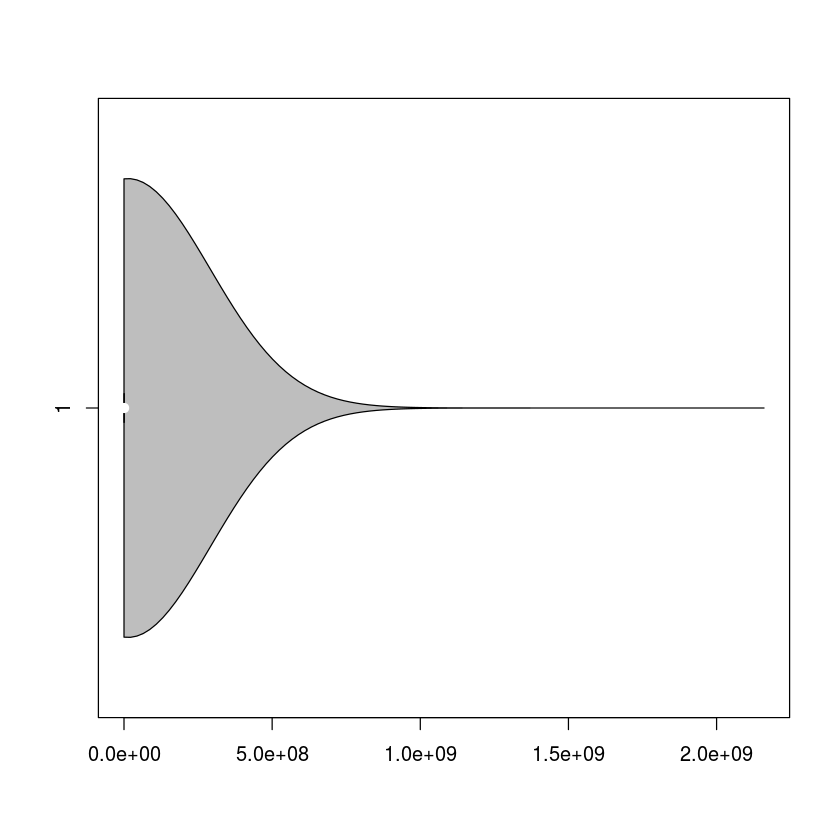

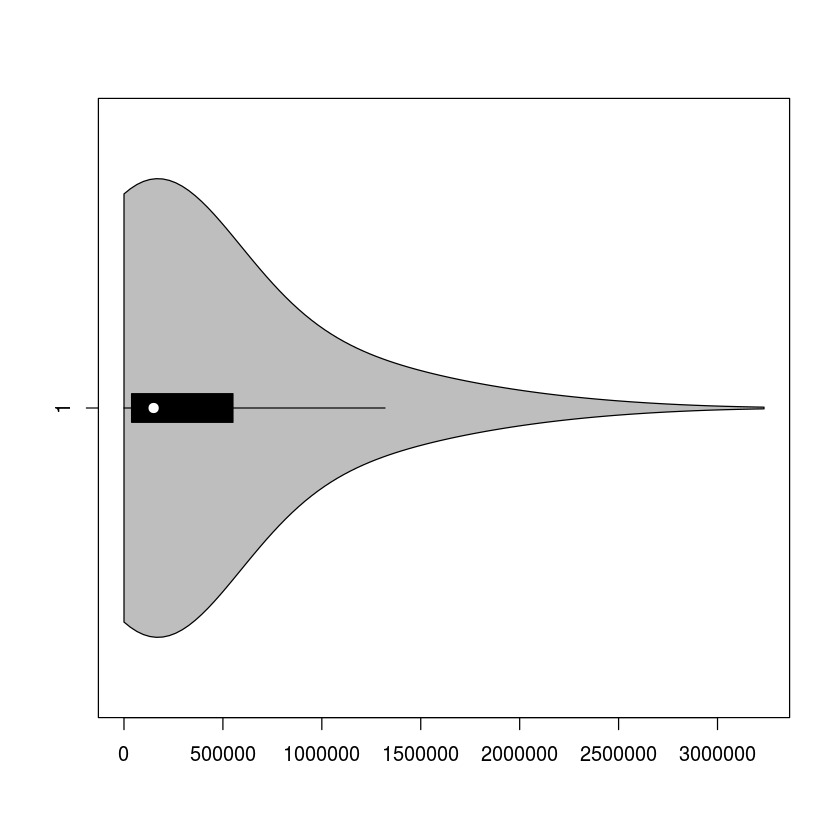

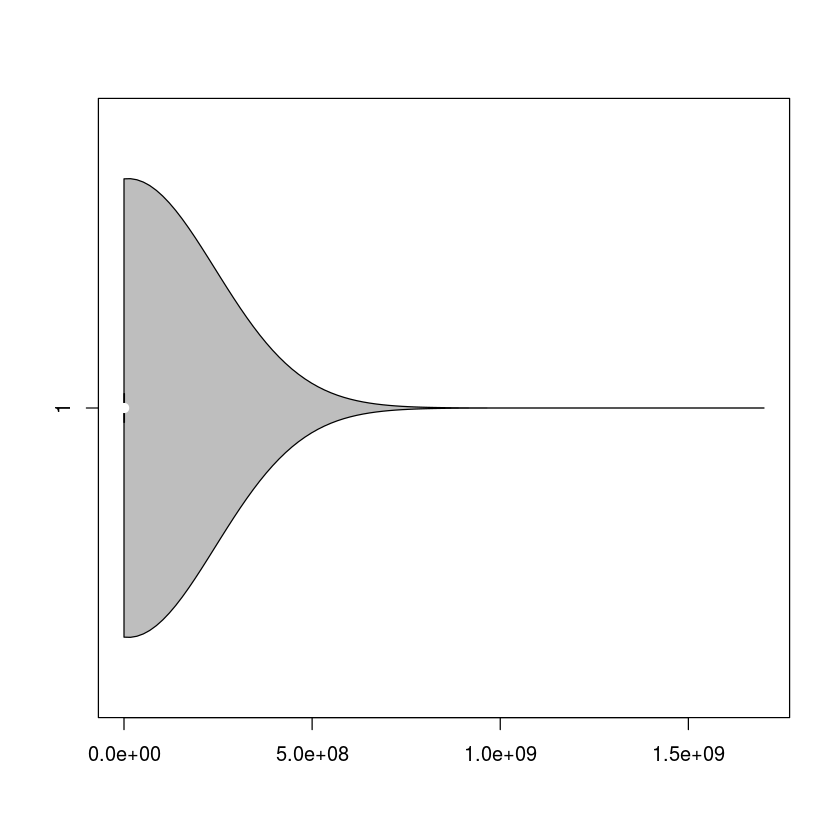

In [60]:
for(x in c("tiv_2015", "tiv_2016")){ 
    vioplot(insurance.res[,x], horizontal=TRUE, col="gray") 
    vioplot(insurance.res[,x], horizontal=TRUE, col="gray") 
    vioplot(insurance[,x], horizontal=TRUE, col="gray") 
}

log="y" selected
log="y" selected


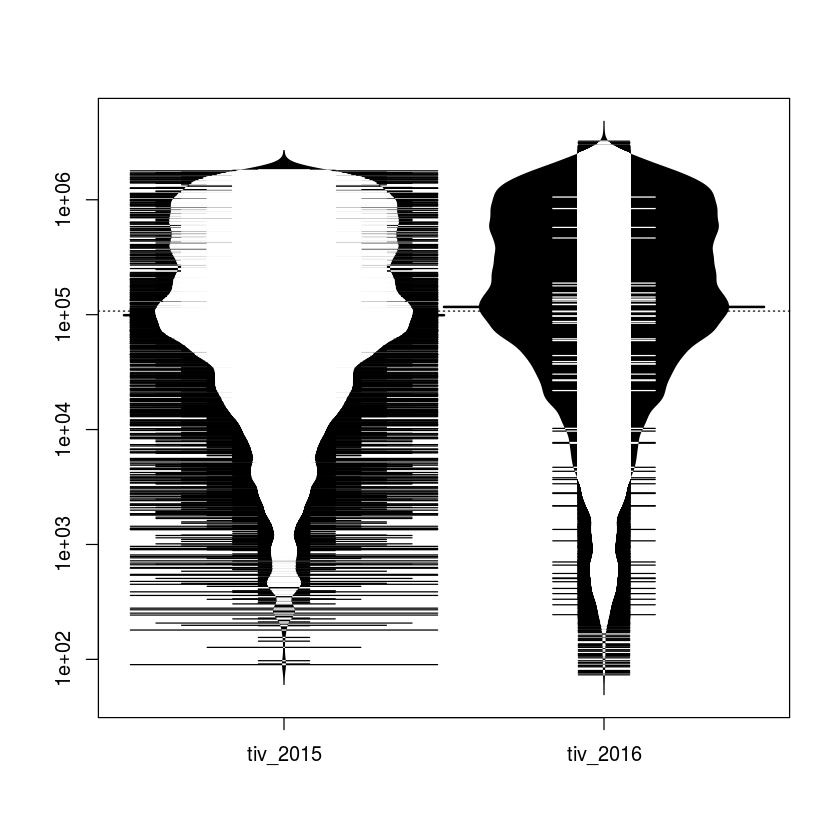

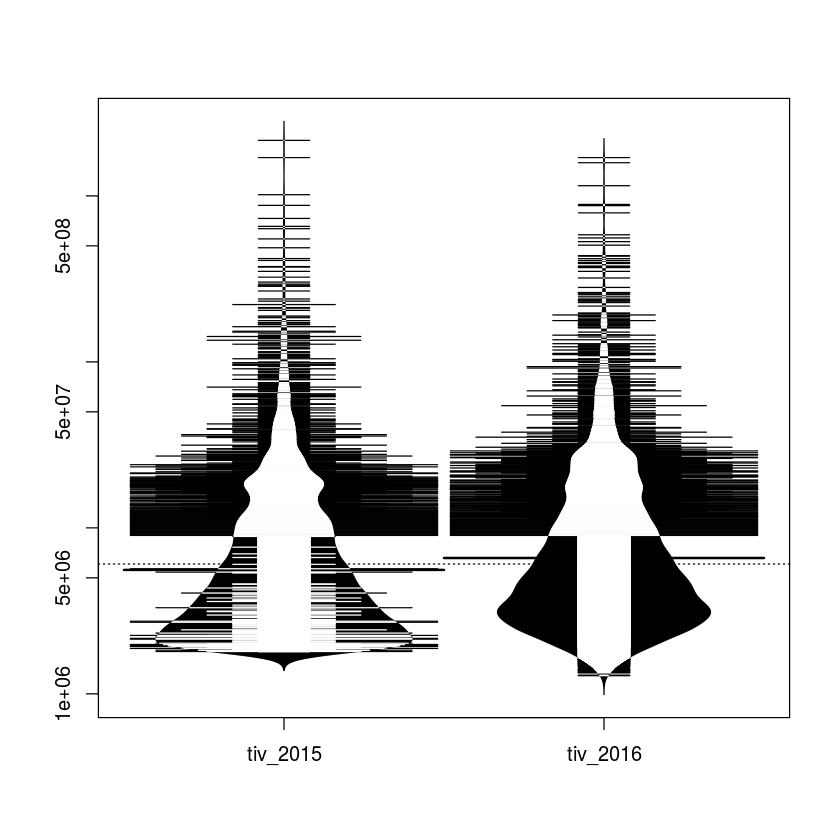

In [61]:
beanplot(insurance.res[,c("tiv_2015", "tiv_2016")])
beanplot(insurance.comm[,c("tiv_2015", "tiv_2016")])